In [ ]:
from pymongo import MongoClient


In [ ]:
from prophet import Prophet

In [16]:
m=Prophet()

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sb
#import binance
from datetime import datetime, timedelta
from dateutil import parser
#pd.options.display.float_format="{:,.1f}".format

# conectar con la DB

In [18]:
client = MongoClient('localhost', 27017)
db=client["back_prueba"]
#db.drop_collection()
data= db.signals.find()
list_data = list(data)


In [19]:
df = pd.DataFrame(list_data)
df.columns


Index(['_id', 'symbol_message', 'symbol', 'currencies', 'is_future', 'is_long',
       'leverage', 'percent_amount', 'is_entry_market', 'entry_targets',
       'take_profit_targets', 'stop_targets', 'trailing_configuration',
       'quantity', 'quantity_take_profit', 'free', 'timeStamp_Tg', 'date',
       'message_id', 'channel', 'channel_id', 'message_link', 'dates_entry',
       'dates_stoploss', 'dates_profit', 'efficiency'],
      dtype='object')

In [20]:
mask=df["symbol"]=="KAVAUSDT"
df.loc[:,["is_long",'dates_entry',
        'dates_profit', 
        'dates_stoploss',
        'symbol',
        "efficiency",
        "channel"]]

,is_long,dates_entry,dates_profit,dates_stoploss,symbol,efficiency,channel
0,True,"{'269.5': 2020-08-28 11:10:00, '267.0': 2020-0...","{'273.0': 2020-08-30 08:35:00, '275.0': 2020-0...",{'257.05': 2020-09-02 07:10:00},BCHUSDT,{'3/3 ': 1.0},Crypto Futures Spot Signals😘
1,True,"{'367.2': 2020-09-14 07:15:00, '363.0': 2020-0...","{'370.0': 2020-09-14 08:00:00, '373.4': 2020-0...",{'352.11': 2020-09-21 07:20:00},ETHUSDT,{'5/5 ': 1.0},Crypto Futures Spot Signals😘
2,False,"{'11030.0': 2020-10-09 07:00:00, '11065.0': 20...","{'10950.0': False, '10900.0': False, '10850.0'...",{'11190.0': 2020-10-09 22:05:00},BTCUSDT,{'0/5 ': 0.0},Crypto Futures Spot Signals😘
3,True,"{'1.1285999999999998': 2021-02-17 03:55:00, '1...","{'2.0': False, '3.0': False}",{'1.0947419999999999': 2021-02-22 10:10:00},ONTUSDT,{'0/2 ': 0.0},𝑪𝒐𝒊𝒏|𝑪𝒐𝒂𝒄𝒉|𝑺𝒊𝒈𝒏𝒂𝒍𝒔
4,True,"{'1.9205999999999999': 2021-02-20 18:15:00, '1...",{'2.03': False},{'1.862982': 2021-02-20 18:30:00},TOMOUSDT,{'0/1 ': 0.0},𝑪𝒐𝒊𝒏|𝑪𝒐𝒂𝒄𝒉|𝑺𝒊𝒈𝒏𝒂𝒍𝒔
5,True,"{'4.2867': 2021-02-18 09:55:00, '4.297525': 20...",{'4.45': 2021-02-18 12:30:00},{'4.158099': 2021-02-18 22:05:00},NEARUSDT,{'1/1 ': 1.0},𝑪𝒐𝒊𝒏|𝑪𝒐𝒂𝒄𝒉|𝑺𝒊𝒈𝒏𝒂𝒍𝒔
6,True,"{'167.0': 2021-08-30 19:45:00, '175.0': 2021-0...","{'176.8': 2021-09-01 10:20:00, '179.0': 2021-0...",{'156.79': 2021-09-20 07:25:00},LTCUSDT,{'9/10 ': 0.9},Bitcoin Bullets VIP Free
7,True,"{'0.264': 2021-09-07 10:45:00, '0.288': 2021-0...","{'0.292': False, '0.3': False, '0.31': False, ...",{'0.244': 2021-09-07 10:55:00},DOGEUSDT,{'0/10 ': 0.0},Bitcoin Bullets VIP Free
8,True,"{'1.033': 2021-09-07 10:55:00, '1.108': 2021-0...","{'1.122': False, '1.14': False, '1.16': False,...",{'0.942': 2021-09-07 11:05:00},ONTUSDT,{'0/14 ': 0.0},Bitcoin Bullets VIP Free
9,False,"{'40.0': 2021-07-26 00:40:00, '41.66': 2021-07...","{'39.0': 2021-07-26 02:25:00, '37.5': 2021-07-...",{'47.76': 2021-07-27 05:25:00},AXSUSDT,{'3/8 ': 0.375},Federal Russian Insiders VIP Free


In [21]:
datetime.utcfromtimestamp(1600081846)

datetime.datetime(2020, 9, 14, 11, 10, 46)

# Read pickle

In [22]:
#df_sygnal_data = pd.read_csv("sygnals_operations.csv")
df_sygnal_data:pd.DataFrame = pd.read_pickle("sygnals_operations.pickle")

# Crear archivo pickle

In [23]:
df.to_pickle('sygnals_operations.pickle',)


# drop a row from df

In [24]:
mask="stop_targets"
df[mask]

0                 [257.05]
1                 [352.11]
2                [11190.0]
3     [1.0947419999999999]
4               [1.862982]
5               [4.158099]
6                 [156.79]
7                  [0.244]
8                  [0.942]
9                  [47.76]
10                  [0.56]
11                [123.05]
Name: stop_targets, dtype: object

In [25]:
df["stop_targets"].apply(lambda x: x.pop(0))
#lis=[].pop(0)
#lis

0       257.050000
1       352.110000
2     11190.000000
3         1.094742
4         1.862982
5         4.158099
6       156.790000
7         0.244000
8         0.942000
9        47.760000
10        0.560000
11      123.050000
Name: stop_targets, dtype: float64

In [26]:
df[["symbol","currencies", "channel"]]


,symbol,currencies,channel
0,BCHUSDT,"{'primary': 'BCH', 'segundary': 'USDT'}",Crypto Futures Spot Signals😘
1,ETHUSDT,"{'primary': 'ETH', 'segundary': 'USDT'}",Crypto Futures Spot Signals😘
2,BTCUSDT,"{'primary': 'BTC', 'segundary': 'USDT'}",Crypto Futures Spot Signals😘
3,ONTUSDT,"{'primary': 'ONT', 'segundary': 'USDT'}",𝑪𝒐𝒊𝒏|𝑪𝒐𝒂𝒄𝒉|𝑺𝒊𝒈𝒏𝒂𝒍𝒔
4,TOMOUSDT,"{'primary': 'TOMO', 'segundary': 'USDT'}",𝑪𝒐𝒊𝒏|𝑪𝒐𝒂𝒄𝒉|𝑺𝒊𝒈𝒏𝒂𝒍𝒔
5,NEARUSDT,"{'primary': 'NEAR', 'segundary': 'USDT'}",𝑪𝒐𝒊𝒏|𝑪𝒐𝒂𝒄𝒉|𝑺𝒊𝒈𝒏𝒂𝒍𝒔
6,LTCUSDT,"{'primary': 'LTC', 'segundary': 'USDT'}",Bitcoin Bullets VIP Free
7,DOGEUSDT,"{'primary': 'DOGE', 'segundary': 'USDT'}",Bitcoin Bullets VIP Free
8,ONTUSDT,"{'primary': 'ONT', 'segundary': 'USDT'}",Bitcoin Bullets VIP Free
9,AXSUSDT,"{'primary': 'AXS', 'segundary': 'USDT'}",Federal Russian Insiders VIP Free


In [27]:
df.columns

Index(['_id', 'symbol_message', 'symbol', 'currencies', 'is_future', 'is_long',
       'leverage', 'percent_amount', 'is_entry_market', 'entry_targets',
       'take_profit_targets', 'stop_targets', 'trailing_configuration',
       'quantity', 'quantity_take_profit', 'free', 'timeStamp_Tg', 'date',
       'message_id', 'channel', 'channel_id', 'message_link', 'dates_entry',
       'dates_stoploss', 'dates_profit', 'efficiency'],
      dtype='object')

In [28]:
mask=df["symbol_message"].str.contains("/")
mask
df=df[mask]

In [29]:
df.channel.value_counts()


Crypto Futures Spot Signals😘    3
Name: channel, dtype: int64

In [30]:
symbols_count = df[["symbol", "channel"]].value_counts().sort_values(ascending=False)
important_symbol = symbols_count.head(40)
type(important_symbol)


pandas.core.series.Series

In [31]:
symbols_count = df[["symbol", "channel"]]
important_symbol = symbols_count
important_symbol.groupby("channel").describe()


symbol                     
                              count unique      top freq
channel                                                 
Crypto Futures Spot Signals😘      3      3  BCHUSDT    1

<AxesSubplot:>

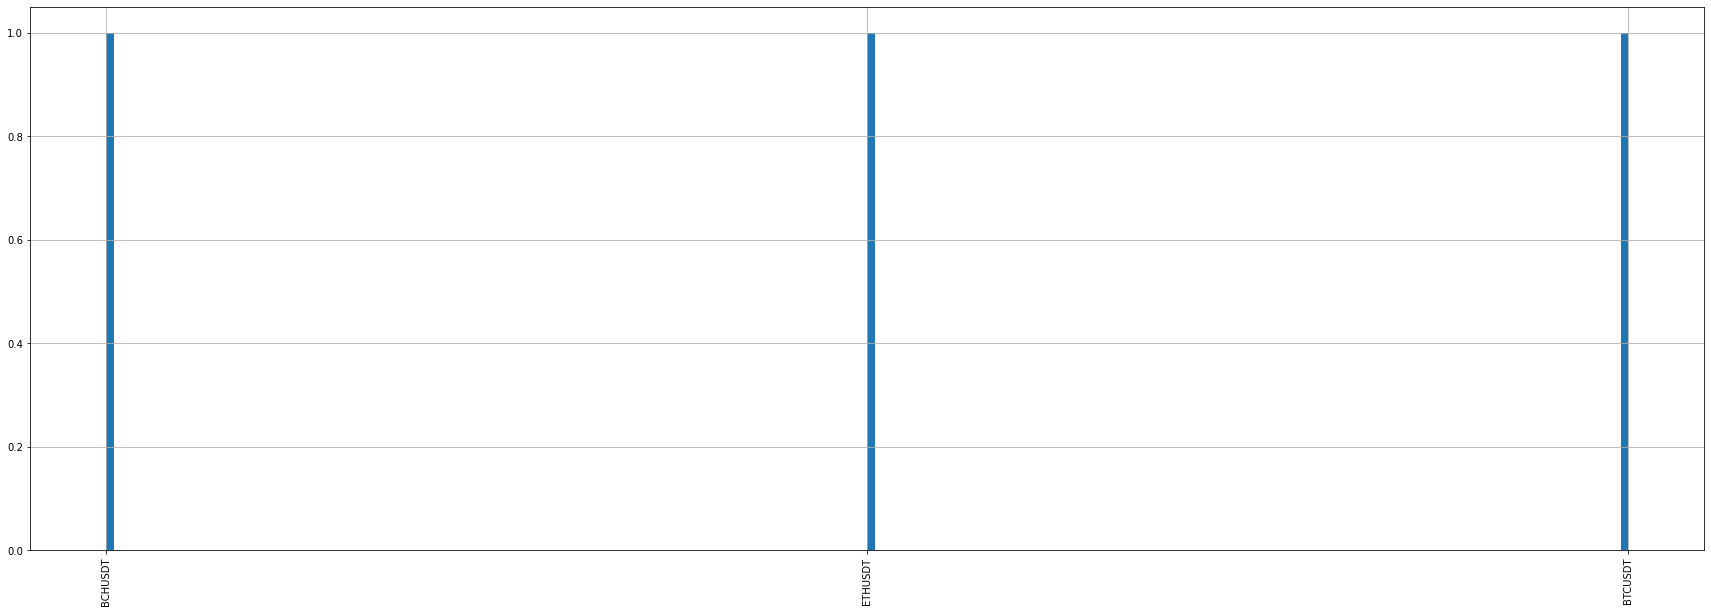

In [32]:
important_symbol["symbol"].hist(figsize=(30, 10),xrot=90, bins=200,)


In [33]:
#plt.figure(figsize=(50, 10))
#plt.xticks(rotation=90)
#sns.histplot(data=important_symbol, x="symbol",hue="channel",palette="Set1")


In [34]:
df[["timeStamp_Tg","message_id","channel_id","date"]]


,timeStamp_Tg,message_id,channel_id,date
0,1598624376,203,-1001381384148,2020-08-28 10:19:36
1,1600081846,281,-1001381384148,2020-09-14 07:10:46
2,1600576224,321,-1001381384148,2020-09-20 00:30:24


In [35]:
from datetime import timedelta, datetime, time

In [36]:
#str(datetime(2020,3,1,1,30,0)-h4)
new=datetime.utcfromtimestamp(1647354765)
old=datetime.fromtimestamp(1647354765)

base=(new-old).total_seconds()/60

base

240.0

In [37]:
import math

In [38]:
h1=60
math.ceil(base/h1)

4

In [39]:
h4 = timedelta(hours=4)
h4

datetime.timedelta(seconds=14400)

In [40]:
df2["datetime"]= pd.to_datetime(df2["timeStamp_Tg"], unit="s")
df2["datetime"]

NameError: name 'df2' is not defined

In [ ]:
df2[["timeStamp_Tg","message_id","channel_id","datetime"]]

,timeStamp_Tg,message_id,channel_id,datetime
0,1647354765,5316,-1001381384148,2022-03-15 14:32:45
1,1646753327,5244,-1001381384148,2022-03-08 15:28:47
2,1646653781,5228,-1001381384148,2022-03-07 11:49:41
3,1645112197,5092,-1001381384148,2022-02-17 15:36:37
4,1645031424,5081,-1001381384148,2022-02-16 17:10:24
...,...,...,...,...
1120,1627603382,97,-1001277174399,2021-07-30 00:03:02
1121,1627583234,95,-1001277174399,2021-07-29 18:27:14
1122,1627543095,88,-1001277174399,2021-07-29 07:18:15
1123,1627410165,66,-1001277174399,2021-07-27 18:22:45


In [ ]:
df2["datetime"]=df2["datetime"].apply(lambda x : x - h4)


In [ ]:
df2[["timeStamp_Tg","message_id","channel_id","datetime"]]

,timeStamp_Tg,message_id,channel_id,datetime
0,1647354765,5316,-1001381384148,2022-03-15 10:32:45
1,1646753327,5244,-1001381384148,2022-03-08 11:28:47
2,1646653781,5228,-1001381384148,2022-03-07 07:49:41
3,1645112197,5092,-1001381384148,2022-02-17 11:36:37
4,1645031424,5081,-1001381384148,2022-02-16 13:10:24
...,...,...,...,...
1120,1627603382,97,-1001277174399,2021-07-29 20:03:02
1121,1627583234,95,-1001277174399,2021-07-29 14:27:14
1122,1627543095,88,-1001277174399,2021-07-29 03:18:15
1123,1627410165,66,-1001277174399,2021-07-27 14:22:45


In [ ]:
if len(data) > 0:  
        old = parser.parse(
            data["timestamp"].iloc[-1]
            )

In [ ]:
if len(data)>0:
    old= parser.parse(
        data["timestamp"].iloc[-1]
    )

In [ ]:
pd.options.display.float_format="{:,.1f}".format
pd.options.display.precision = 1

# Leyendo symbol data

In [ ]:
df_symbol:pd.DataFrame=pd.read_pickle("../../BTCUSDT-5m-data.pickle")
#df_symbol.to_csv("BTCUSDT-5m-data.csv")

# Revisando el orden de los tiempos

Efectivamente como el index es timestamp.

In [ ]:
### slice
date_start="2020-09-20 00:30:24"
date_end=pd.to_datetime("2020-05-05 15:45:01")
mask: pd.Series = df_symbol["date_myUTC"]
mask = mask.between(date_start, date_end)
temp_df_symbol=df_symbol[mask]

# Compara los años de cada elemento con el año de la fecha dada
#mask=df_symbol["date_myUTC"].apply(lambda x : x.year) == date_end.year
#df_symbol[mask].empty


True

In [ ]:
df_symbol.loc[:, ["open", "high", "low", "close"]] = df_symbol.loc[:, ["open", "high", "low", "close"]].astype(float)
operate=11030
mask=mask = (df_symbol["date_myUTC"] == pd.to_datetime("2022")) #(df_symbol["high"] >= operate) #| (df_symbol["low"] <= operate)
df_symbol.iloc[0]#.loc[:,["open", "high", "low", "close","date_myUTC"]]

open                      46216.93
high                      46391.49
low                       46208.37
close                     46321.34
volume                185.67558000
close_time           1640995499999
quote_av          8598314.37243310
trades                        4551
tb_base_av            106.54655000
tb_quote_av       4933083.00041560
ignore                           0
date_myUTC     2021-12-31 20:00:00
Name: 1640995200000, dtype: object

In [ ]:
plt.

# Capturar la eficiencia con los take profit

In [ ]:
dates_profit={
    "0.292": {
      "$date": "2021-09-01T14:50:00Z"
    },
    "0.3": {
      "$date": "2021-09-01T20:30:00Z"
    },
    "0.31": {
      "$date": "2021-09-01T21:30:00Z"
    },
    "0.325": False,
    "0.34": False,
    "0.36": False,
    "0.38": False,
    "0.4": False,
    "0.42": False,
    "0.45": False
  }

In [ ]:
(len(list(dates_profit.values()))-list(dates_profit.values()).count(False))/len(list(dates_profit.values()))

0.3

In [ ]:
3/10

0.3

In [ ]:
df_sygnal_data.iloc[1]#["entry_targets"][1]

NameError: name 'df_sygnal_data' is not defined

In [ ]:
# %%timeit 3.46 ms
mask:pd.Series=BTCUSDT_date["date_myUTC"]
mask=mask.between("2022-03-08","2022-04-08")
btc_by_date=BTCUSDT_date[mask]
btc_by_date.iloc[1]
btc_by_date.shape


(8929, 12)

In [ ]:
# %%timeit 394 ms

mask:pd.Series=BTCUSDT_date["date_myUTC"]
mask=mask.isin(pd.date_range(start="2022-03-08 00:00.00",end=str(BTCUSDT_date["date_myUTC"].iloc[-1]),freq="1s"))
btc_by_date=BTCUSDT_date[mask]
btc_by_date.iloc[1]
btc_by_date.shape


(12305, 12)

In [ ]:
# %%timeit 115 ms

mask:pd.Series=BTCUSDT_date["date_myUTC"]
mask=mask.isin(pd.date_range(start="2022-03-08 00:00.00",end="2022-04-08 00:00.00",freq="1s"))
btc_by_date=BTCUSDT_date[mask]
btc_by_date.iloc[1]
btc_by_date.shape


(8929, 12)

In [ ]:
# %%timeit 4.24 ms
mask=(BTCUSDT_date["date_myUTC"] > 
pd.to_datetime("2022-03-08 00:00.00")) & (BTCUSDT_date["date_myUTC"] <= 
pd.to_datetime("2022-04-08 00:00.00"))
btc_by_date=BTCUSDT_date[mask]
btc_by_date.iloc[1]
btc_by_date.shape

(8928, 12)

In [ ]:
def t(la_t):
    if la_t:
        return "la_t"
    print("aqui toy")
    return "No la_t"

t(True)

'la_t'

In [ ]:
def regresar(row,iterated,returned):
    l=[]
    for row in iterated:
        l.append(returned)
    return l


# Funciones para los df

In [10]:
def float_ohlcv(df_symbol):
    df_symbol2=df_symbol.copy()
    df_symbol2[["open","high","low","close"]]=df_symbol2[["open","high","low","close"]].astype(float)
    return df_symbol2

# Probando recorrer filas

In [ ]:
%%timeit
l=[]
l.append(df_sygnal_data.apply(lambda row: row["date"],axis=1))
l

13.2 ms ± 56.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
%%timeit
#for row in df_sygnal_data.itertuples():
#    print(row.date)
regresar(row,df_sygnal_data.itertuples(),row.date)


5.14 ms ± 209 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
%%timeit
#for index, row in df_sygnal_data.iterrows():
#    print(row.date)
regresar((index,row),df_sygnal_data.iterrows(),row.date)    

35.4 ms ± 479 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
%%timeit
#for i in range(len(df_sygnal_data)):
#    print(df_sygnal_data.loc[i,"date"])
regresar(i,range(len(df_sygnal_data)),df_sygnal_data.loc[i,"date"])

92.9 µs ± 1.15 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [40]:
df_sygnal_data.columns

NameError: name 'df_sygnal_data' is not defined

In [77]:
df_symbol.iloc[0,0]
float(df_symbol.iloc[0,0])

46216.93

In [159]:
operate=43000
mask=(df_symbol2["open"])>=operate | (df_symbol2["high"]>=operate) | (df_symbol2["low"]>=operate) | (df_symbol2["close"]>=operate) & df_symbol2["date_myUTC"].between("2020-03-08","2022-04-08")

lalist:pd.DataFrame= df_symbol[mask].iloc[0:3][["date_myUTC","open"]]

ladict={k[1]:k[0] for k in lalist.to_dict("split")["data"]}
list(ladict.values())[0]

Timestamp('2021-12-31 20:00:00')

In [117]:
lalist.sort(reverse=True)
lalist

[Timestamp('2021-12-31 20:10:00'),
 Timestamp('2021-12-31 20:05:00'),
 Timestamp('2021-12-31 20:00:00')]

# Otras pruebas

In [7]:
l1=[0,1,2,3]
l2=["a","b","c","d"]
d1={}

for i in l1:
    d1[i]=l2[i]

d1

{0: 'a', 1: 'b', 2: 'c', 3: 'd'}

# Leer documentos bases de datos .db con pandas

In [7]:
import sqlite3
dat=sqlite3.connect("C:/Users/Joan/Downloads/Programa/tradingview.db")

In [13]:
dat
sqlite3.table

30

In [17]:
df=pd.read_sql_query("SELECT * FROM tv", dat)

In [25]:
df[df["exchange"]=='BINANCE']

,screener,exchange,symbol,desc
13484,crypto,BINANCE,ALICEBTC,ALICE / Bitcoin
13488,crypto,BINANCE,MANABTC,Decentraland / Bitcoin
13493,crypto,BINANCE,BURGERUSDT,BURGER / TetherUS
13495,crypto,BINANCE,EPSUSDT,EPS / TetherUS
13499,crypto,BINANCE,RSRBTC,RSR / Bitcoin
...,...,...,...,...
69751,crypto,BINANCE,GALUSDT_PREMIUM,GALUSDT Premium Index
69757,crypto,BINANCE,GALUSD,GAL / US Dollar (calculated by TradingView)
69768,crypto,BINANCE,ASTRBTC,ASTR / Bitcoin
69782,crypto,BINANCE,STEEMUSDT,Steem / TetherUS


In [22]:
df["exchange"].unique()

array(['NASDAQ', 'NYSE', 'OTC', 'AMEX', 'FX_IDC', 'BINANCE', 'BITFINEX',
       'HITBTC', 'KUCOIN', 'BITTREX', 'KRAKEN', 'COINBASE', 'EXMO',
       'HUOBI', 'BITHUMB', 'BITSTAMP', 'POLONIEX', 'CURRENCYCOMLEV',
       'OKCOIN', 'COINFLOOR', 'KORBIT', 'BYBIT', 'BITKUB', 'CAPITALCOM',
       'GEMINI', 'BITFLYER', 'MERCADO', 'CEXIO', 'BITPANDAPRO',
       'TRADESTATION', 'THEROCKTRADING', 'BITSO', 'BTCYOU', 'IDX', 'NSE',
       'BSE', 'TVC', 'DJ', 'CBOE', 'EURONEXT', 'SIX', 'OANDA', 'OMXCOP',
       'FTSEMYX', 'TWSE', 'BVC', 'OMXVSE', 'OMXSTO', 'FX', 'TSX', 'BME',
       'BIST', 'OMXRSE', 'OMXTSE', 'SZSE', 'HSI', 'SP', 'DFM', 'EGX',
       'BAHRAIN', 'BMV', 'BMFBOVESPA', 'OMXICE', 'ASX', 'TADAWUL', 'XETR',
       'TASE', 'QSE', 'GPW', 'OMXHEX', 'BVL', 'MOEX', 'BCBA', 'BCS',
       'NZX', 'BELEX', 'NYMEX_MINI', 'CME_MINI', 'CBOT', 'NYMEX', 'CME',
       'COMEX', 'ICEUS', 'CBOT_MINI', 'COMEX_MINI', 'EUREX', 'LSE',
       'LSIN', 'CRYPTOCAP', 'FTX', 'HNX', 'HOSE', 'UPCOM', 'JSE', 'SET',
     

In [16]:
df=pd.read_sql_query("SELECT name FROM sqlite_schema WHERE type='table' ORDER BY name ",dat)


,name
0,tv


# Prueba tradingview

In [5]:
import tradingview_ta

In [6]:
from tradingview_ta import TA_Handler, Interval, Exchange

tesla = TA_Handler(
    symbol="TSLA",
    screener="america",
    exchange="NASDAQ",
    interval=Interval.INTERVAL_1_DAY
)
#tesla.add_indicators(["RSI7","VWMA"])
print(tesla.get_analysis().summary)
tesla.get_indicators()

{'RECOMMENDATION': 'SELL', 'BUY': 4, 'SELL': 12, 'NEUTRAL': 10}


{'Recommend.Other': 0,
 'Recommend.All': -0.26666667,
 'Recommend.MA': -0.53333333,
 'RSI': 40.6248634,
 'RSI[1]': 33.87941266,
 'Stoch.K': 18.45264971,
 'Stoch.D': 12.20994537,
 'Stoch.K[1]': 9.87424891,
 'Stoch.D[1]': 9.75377428,
 'CCI20': -67.45872517,
 'CCI20[1]': -108.88690915,
 'ADX': 35.29419386,
 'ADX+DI': 16.0146296,
 'ADX-DI': 30.00688413,
 'ADX+DI[1]': 10.87271041,
 'ADX-DI[1]': 32.58286731,
 'AO': -199.69657971,
 'AO[1]': -204.79210206,
 'Mom': -20.27,
 'Mom[1]': -75.2,
 'MACD.macd': -70.98531378,
 'MACD.signal': -66.63947205,
 'Rec.Stoch.RSI': 0,
 'Stoch.RSI.K': 47.90140859,
 'Rec.WR': 0,
 'W.R': -61.27254954,
 'Rec.BBPower': 0,
 'BBPower': -72.27844586,
 'Rec.UO': 0,
 'UO': 45.23463314,
 'close': 707.73,
 'EMA5': 682.10036567,
 'SMA5': 666.698,
 'EMA10': 704.8021852,
 'SMA10': 700.829,
 'EMA20': 760.8291574,
 'SMA20': 771.597,
 'EMA30': 801.81917637,
 'SMA30': 835.79566667,
 'EMA50': 848.18391531,
 'SMA50': 911.7546,
 'EMA100': 888.37525898,
 'SMA100': 912.4206,
 'EMA200'

## funciones

In [7]:
def get_tv_ta_recomendation(symbol:str)-> dict:
    handler=TA_Handler(
        symbol=symbol,
        screener="crypto",
        exchange="BINANCE",
        interval=Interval.INTERVAL_5_MINUTES
    )
    return handler.get_indicators()

In [49]:
#data_path="C:/Users/Joan/Documents/Programacion/Python/Pasantias/analisis_read_binance/Proyecto/notebooks/sygnals_operations.csv"
df_sygnal_data= pd.read_csv("sygnals_operations.csv")

In [ ]:
df_sygnal_data=df_sygnal_data.iloc[:5]
df_recomendation= []
for i in range(len(df_sygnal_data)):
    print(f"""i:{i} --- symbol:{df_sygnal_data.loc[i,"symbol"]}""")
    dict_recomendation=get_tv_ta_recomendation(df_sygnal_data.loc[i,"symbol"])
    df_recomendation.append(dict_recomendation)

In [63]:
dict_recomendation=get_tv_ta_recomendation(df_sygnal_data.loc[0,"symbol"])

In [64]:
dict_recomendation

{'RECOMMENDATION': 'SELL', 'BUY': 2, 'SELL': 13, 'NEUTRAL': 11}

# Probando pandas_ta

In [2]:
import pandas_ta as ta

In [12]:
df_symbol=pd.read_pickle("../../ATOMBTC-5m-data.pickle")

In [13]:
df_symbol=float_ohlcv(df_symbol=df_symbol)

Para copiar las recomendaciones de trading view revisar:

- Trading view compute: https://github.com/brian-the-dev/python-tradingview-ta/blob/main/tradingview_ta/technicals.py

- Trading view clasification: https://github.com/brian-the-dev/python-tradingview-ta/blob/main/tradingview_ta/main.py

In [30]:
# OSCCILATORS
#rsi
df_symbol.ta.rsi() # need a RSI1
df_symbol.ta.rsi(length=5) # is RSI1

#stoch
df_symbol.ta.stoch() # need a stk1 and a std1
df_symbol.ta.stoch().iloc[-2] # the before value are stk1 and std1

#CCI 20 and CCI 201 (this is the before value of CCI 20)
cci=pd.concat(
    [df_symbol.ta.cci(length=20).iloc[-1],df_symbol.ta.cci(length=20).iloc[-2]],axis=1)
cci
#ADX (14)
df_symbol.ta.adx(length=14,) # need an adxpdi1, adxndi1
#AO
df_symbol.ta.ao() # need an ao1, ao2

timestamp
1556510400000         NaN
1556510700000         NaN
1556511000000         NaN
1556511300000         NaN
1556511600000         NaN
                   ...   
1653650700000    0.000004
1653651000000    0.000005
1653651300000    0.000005
1653651600000    0.000006
1653651900000    0.000006
Name: AO_5_34, Length: 323080, dtype: float64

In [41]:
tv=get_tv_ta_recomendation("ATOMBTC")
tv['CCI20'],tv['CCI20[1]']


#tv.keys()

(-65.86559858, -16.03432701)

In [43]:
df_symbol=pd.read_pickle("../../ATOMBTC-5m-data.pickle")
df_symbol=float_ohlcv(df_symbol=df_symbol)
df_symbol.ta.cci(length=20).iloc[-5:], df_symbol.ta.cci(length=201).iloc[-5:] # need a RSI1


(timestamp
 1653655500000    106.651802
 1653655800000     39.899624
 1653656100000     17.513304
 1653656400000    -14.686248
 1653656700000    -63.794804
 Name: CCI_20_0.015, dtype: float64,
 timestamp
 1653655500000    193.358763
 1653655800000    166.831274
 1653656100000    159.655917
 1653656400000    151.013076
 1653656700000    136.034932
 Name: CCI_201_0.015, dtype: float64)